In [1]:
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tools import PDF

pd.set_option('display.max_columns', None)
plt.rcParams['axes.axisbelow'] = True
pdf = PDF('output/discovering/')

t = time.time()

In [2]:
df = pd.read_csv('data/df_train.csv')
df_test = pd.read_csv('data/df_test.csv')

In [3]:
df.dtypes

Unnamed: 0                                          int64
day                                                object
hashed_partner_id                                  object
hashed_campaign_id                                 object
contextid                                           int64
display_env                                        object
target_env                                          int64
rtbtypeid                                         float64
rtbadvisibility                                   float64
rtb_detectedlanguage                              float64
urlhash2                                          float64
urlhash3                                          float64
urlhash4                                          float64
user_country                                       object
hashed_affiliateid                                 object
hashed_app_id                                      object
googleviewability                                 float64
googlepagevert

In [4]:
print(f"Nombre d'observations (jeu d'entraînement) : {len(df)}.")
print(f"Nombre d'observations (jeu de test) : {len(df_test)}.")
print(f"Nombre total d'observations : {len(df) + len(df_test)}.")
print(f"Proportion des observations dans le jeu d'entraînement : {len(df) / (len(df) + len(df_test))}.")
print(f"Proportion des observations dans le jeu de test : {len(df_test) / (len(df) + len(df_test))}.")
print(f"Nombre de variables : {len(df.columns) - 1})")

Nombre d'observations (jeu d'entraînement) : 1855314.
Nombre d'observations (jeu de test) : 279927.
Nombre total d'observations : 2135241.
Proportion des observations dans le jeu d'entraînement : 0.8689014495319264.
Proportion des observations dans le jeu de test : 0.13109855046807362.
Nombre de variables : 47)


In [5]:
df

,Unnamed: 0,day,hashed_partner_id,hashed_campaign_id,contextid,display_env,target_env,rtbtypeid,rtbadvisibility,rtb_detectedlanguage,urlhash2,urlhash3,urlhash4,user_country,hashed_affiliateid,hashed_app_id,googleviewability,googlepagevertical,campaignscenario,campaignvertical,campaignctrlast24h,is_interstitial,dayssincelastvisitdouble,ltf_lastpartnerclicktimestamp,ltf_nbglobalclick_4w,ltf_nbglobaldisplay_4w,ltf_nbglobaldisplaysincelastpartnerproductview,ltf_nbpartnerdisplayssincelastclick,ltf_nbpartnerclick_4w,ltf_nbpartnerdisplay_4w,ltf_nbpartnersales_4w,ltf_nbpartnerdisplay_90d,ltf_nbpartnerclick_90d,ltf_nbpartnersales_90d,nbdayssincelastclick,nbdisplay_1hour,nbdisplaypartnerapprox_1d_sum_xdevice,nbdisplayaffiliateapprox_1d_sum_xdevice,nbdisplayglobalapprox_1d_sum_xdevice,hashed_uid,hashed_xd_id,valueperclick,device_type,display_width,display_height,display_timestamp,is_display_clicked,zonecostineuro
0,0,2020-10-19,b'=\xa6\xeef\x99\xda\x1e\xb5-5\x8a\xa5\x9b\x8e...,"b""f|g\xd5T\xc8\xe2\x90\xc6\xc8\xfeL\x0c\x15\xe...",6,web,1,74.0,0.0,127.0,1.697895e+08,1.697895e+08,1.697895e+08,FR,b'\xd2\x87g\xe8\x9f\xdaE\x86z\x12\xbb\x8fz{\x8...,"b""\xe3\xb0\xc4B\x98\xfc\x1c\x14\x9a\xfb\xf4\xc...",NaN,-1.0,13,20.0,0.003768,False,1.086,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,2.0,NaN,2.000000,23.000000,b'\x99w[\xb8\xe1\x9e\xbaz\x01\x06\x9c\xdc\x03\...,b'\xdb\xfc\xdfBY`$\x97\xf9\xaaGn\x98\xe0{RQ\x9...,0.529218,Android,0,0,1603150590,0,0.366238
1,1,2020-10-19,b'=\xa6\xeef\x99\xda\x1e\xb5-5\x8a\xa5\x9b\x8e...,b'7\xa0%5\x98\x02\x00\xe5\xa2\xfb\xd6\xa9^\xb7...,0,web,1,74.0,0.0,127.0,3.589877e+08,3.589877e+08,3.589877e+08,FR,b'\xd2\x87g\xe8\x9f\xdaE\x86z\x12\xbb\x8fz{\x8...,"b""\xe3\xb0\xc4B\x98\xfc\x1c\x14\x9a\xfb\xf4\xc...",NaN,-1.0,13,20.0,0.005846,False,-1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,5.000000,42.000000,98.252222,b'>\x1a\x00W\xb0\x81\x06\x00\x90\xc8\x8aL\xb4\...,b'\xe9\xcd\x80\xb5\x96\xcf8\x8eo(p-\x0f\xf4\xf...,0.269752,Desktop,0,0,1603150640,0,0.025551
2,2,2020-10-19,"b'\xa1l\n\xb2`\xe3\x0b""\xcd\x06\xfa\xdf\x9aj0\...","b'\xbe\xa0?\xc2</,\xa4&w\x86\xe9\x150Y\xd4\xdf...",6,web,1,4.0,2.0,10.0,-1.859395e+09,4.960864e+07,2.901651e+07,ES,b'uS\x86\x94[2\xe0\xe7\x8f\xf8\x0f\xd5\xa5\x1d...,NaN,20.0,-1.0,0,20.0,0.014426,False,4.716,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,0.0,5.000000,NaN,11.000000,b'o\xa5~{\xf5\xd0C\xac_\xa9\x10\x95\x04L\x8a\x...,b'o\xa5~{\xf5\xd0C\xac_\xa9\x10\x95\x04L\x8a\x...,0.095993,Android,640,150,1603150780,0,0.289000
3,3,2020-10-19,b'=\xa6\xeef\x99\xda\x1e\xb5-5\x8a\xa5\x9b\x8e...,b'7\xa0%5\x98\x02\x00\xe5\xa2\xfb\xd6\xa9^\xb7...,6,web,1,73.0,1.0,127.0,-8.462803e+08,8.353379e+08,-1.975498e+09,FR,"b""\xa7\xc0\x1a\x91Je\xfbF}\xedD\x8ah\xfc-\x1a'...",NaN,NaN,-1.0,13,20.0,NaN,False,0.296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,32.0,40.000000,31.000000,57.000000,b'\xf2\x93e\xae\xadBh\x9f<<\x9e\xf0\x91q\xba\x...,"b'\x83u\xce\x10n\x9f\x10hP\x0cI\xdb \xed\xa8,E...",0.269752,iPhone,2,2,1603150840,0,0.243945
4,4,2020-10-19,b'\x0f\xbc\x909\x14[dI\xa7v]\xcc\x00\xd3\xbd\x...,b'\xa0\t^\xa5Z\x06[-\x86\x13\xd8\x08\x98\x8de\...,8,app_ios,2,74.0,0.0,127.0,NaN,NaN,NaN,IT,b'\xdc\xc8+Uj\x07\xbd\xa7[sI\xd8\x90\xb8\xb0\x...,b'\xa5B\xff\x1e\xcb\xcf\xae\x06R\xf3\xc3\xe1-|...,NaN,-1.0,0,20.0,0.017327,False,0.004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44,0.0,1.000000,2.000000,2.000000,b'\xe6\xa9\xb2:\xc5\x04\xfd\x89/Lg\xc1\x0e\xa4...,b'\xe6\xa9\xb2:\xc5\x04\xfd\x89/Lg\xc1\x0e\xa4...,0.136416,iPhone,0,0,1603149970,0,0.647304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1855309,1856868,2020-10-13,b'=\xa6\xeef\x99\xda\x1e\xb5-5\x8a\xa5\x9b\x8e...,b'\xef5\x9d\xc0y\x18\xa1\x8c\xa5l\xb5\r\x92-\x...,0,app_android,1,4.0,1.0,12.0,1.384186e+09,-6.162982e+07,-6.396569e+08,FR,b'\x16DWw\xb6\xfd\xd0&\x1d!x:Kh\x88\x00\xa4\xc...,b'tR\xdb\x0f\xbdNo=\x8a\x9b\xbd\xf9@#\x97\xf3\.

In [6]:
df_test

,Unnamed: 0,day,hashed_partner_id,hashed_campaign_id,contextid,display_env,target_env,rtbtypeid,rtbadvisibility,rtb_detectedlanguage,urlhash2,urlhash3,urlhash4,user_country,hashed_affiliateid,hashed_app_id,googleviewability,googlepagevertical,campaignscenario,campaignvertical,campaignctrlast24h,is_interstitial,dayssincelastvisitdouble,ltf_lastpartnerclicktimestamp,ltf_nbglobalclick_4w,ltf_nbglobaldisplay_4w,ltf_nbglobaldisplaysincelastpartnerproductview,ltf_nbpartnerdisplayssincelastclick,ltf_nbpartnerclick_4w,ltf_nbpartnerdisplay_4w,ltf_nbpartnersales_4w,ltf_nbpartnerdisplay_90d,ltf_nbpartnerclick_90d,ltf_nbpartnersales_90d,nbdayssincelastclick,nbdisplay_1hour,nbdisplaypartnerapprox_1d_sum_xdevice,nbdisplayaffiliateapprox_1d_sum_xdevice,nbdisplayglobalapprox_1d_sum_xdevice,hashed_uid,hashed_xd_id,valueperclick,device_type,display_width,display_height,display_timestamp,is_display_clicked,zonecostineuro
0,0,2020-10-20,b'\xa3w\x0e\x92#\xa6\xa8\x1b\xe2\xbeS\x85C\x10...,b'\x9aMGt\x00\x1a\xf4\xee\x0fS\xe5\x03\xd0\x88...,0,web,1,79.0,0.0,10.0,8.842972e+07,-1.424632e+09,-5.877206e+07,ES,"b""\x05\xb6\x88#\x88\xd7C\x91\x9cDF\x027\x84`\x...","b""\xe3\xb0\xc4B\x98\xfc\x1c\x14\x9a\xfb\xf4\xc...",NaN,-1.0,6,200002,0.003169,False,-1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000000,4.000000,NaN,40.000000,"b'\x9fY\x9b\xc1o\xd7\xbf\xfb""\r@\xee>\x8eM\x05...",b'\x12\xb97|\xbe~\\\x94\xe8\xa7\r\x9d#\x92\x95...,0.204246,Android,0,0,1603236320,0,1.349173
1,1,2020-10-20,b'=\xa6\xeef\x99\xda\x1e\xb5-5\x8a\xa5\x9b\x8e...,b'G\x85\xe1u\x9a\x85\x158\xbdb\x91\xde2\x16\x0...,6,web,1,73.0,1.0,127.0,-2.684551e+08,-2.684551e+08,-2.684551e+08,FR,b'\xa2\x14B}\xf6\xdb\xd2\xaf~eyuW\xa2\x9ae\xda...,NaN,NaN,-1.0,12,20,0.005561,False,0.503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,4.000000,10.000000,NaN,12.000000,"b""\xf0x]\x9a\xe7/\xd7=\xcd\x82&\x9b\xd1\xc4Qu:...","b""\xf0x]\x9a\xe7/\xd7=\xcd\x82&\x9b\xd1\xc4Qu:...",0.585255,Android,300,250,1603236820,0,0.050001
2,2,2020-10-20,b'\xa3w\x0e\x92#\xa6\xa8\x1b\xe2\xbeS\x85C\x10...,b'%\x01\xb1\xdf)Dh\x9f=j\xe81my\xf9\xa3\xe1\xd...,9,web,1,4.0,2.0,9.0,1.219344e+09,-1.935520e+09,-1.935520e+09,ES,b'\x8b\x8eo&\xeb\x811\x0b\xcau\xcb\x86)\x8c\x9...,NaN,68.0,-1.0,0,200002,0.006584,False,0.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,10.000000,10.000000,10.000000,18.000000,b'\xc2p\x9c\xcf0\xe9\xbf\xb0b\xa3\x89G\x90\x08...,b'\x12\xb97|\xbe~\\\x94\xe8\xa7\r\x9d#\x92\x95...,0.153290,Desktop,510,280,1603236840,0,2.210000
3,3,2020-10-20,b'F\xb7$\xb2\xf8]O{\xd4\x85B:\x04\xbc\xf2\xcf\...,b'z+\xb4py\xb9\xd8\x1eG\xbf\x19\x00\x0e\xa8\xf...,9,web,1,4.0,2.0,24.0,-5.447171e+08,2.597535e+08,-1.189036e+08,IT,"b""\xaa\xf6\x86u\xc4\xbe\xa5`\x0c'?mCq\xe8\xd1\...",NaN,18.0,-1.0,0,14,0.008545,False,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,5.000000,5.000000,5.000000,5.000000,b'\x91\xdaT\xa4\x050RX>7m\xd3S*\xb1P\xf0\xbb\x...,b':\xaaXO=\xe67\xbaL\xed\xdb\xfa\x9c\xdb\xe4Yp...,0.187720,Android,320,480,1603236530,0,1.880000
4,4,2020-10-20,b'=\xa6\xeef\x99\xda\x1e\xb5-5\x8a\xa5\x9b\x8e...,b'Q\xba\x90%\xf8\xb0V\xdcM\xd4\r)1\x9d\x0f)w\x...,0,app_android,1,5.0,0.0,12.0,NaN,NaN,NaN,FR,b'NX\\\x99A\xf5\xe8\tT\xbd\xef\xa6\x85{;\xa8\x...,b'\x0e53\x04\x8a\xf8q>t\xe9\xfdx\xe1\xa8\xab\x...,NaN,-1.0,11,20,0.009612,False,-1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.000000,15.000000,252.361944,301.723889,b'\x14x\x95\xf5Y\x85\xa7\xc32<n\xc5\xf4oF~\xfc...,"b'\xca\xb2F\x08\xba\x93\x1c\xbb\xb5,\xefL\xcf\...",0.050532,Android,320,50,1603236570,0,0.016971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279922,280122,2020-10-20,"b'\xa1l\n\xb2`\xe3\x0b""\xcd\x06\xfa\xdf\x9aj0\...",b'\x18Z\x0e\x9a\x9ap\x0f\x80\x1d\xdc\x9c\x80\x...,6,web,1,4.0,2.0,10.0,-5.888793e+08,-5.888793e+08,-5.888793e+08,ES,b'=\x8a\x8eO\xc8\x0e\xa7\xc8\xe5=\x90\x04\x7fz...,NaN,47.0,-1.0,12,20,0.008952,False,0.002,NaN,NaN

In [7]:
pd.DataFrame({"Valeurs manquantes":df[df.columns[df.isnull().sum() != 0]].isnull().sum(), "Proportion manquante":df[df.columns[df.isnull().sum() != 0]].isnull().sum()/len(df)})[["Proportion manquante"]].sort_values("Proportion manquante", ascending=False)

,Proportion manquante
ltf_nbpartnersales_4w,0.997217
ltf_nbpartnersales_90d,0.995440
ltf_nbpartnerclick_4w,0.993874
ltf_nbpartnerdisplayssincelastclick,0.991794
ltf_lastpartnerclicktimestamp,0.991498
ltf_nbpartnerclick_90d,0.991498
ltf_nbglobalclick_4w,0.988667
ltf_nbglobaldisplaysincelastpartnerproductview,0.988471
ltf_nbpartnerdisplay_4w,0.983209
ltf_nbpartnerdisplay_90d,0.982932


In [8]:
df.describe()

,Unnamed: 0,contextid,target_env,rtbtypeid,rtbadvisibility,rtb_detectedlanguage,urlhash2,urlhash3,urlhash4,googleviewability,googlepagevertical,campaignscenario,campaignvertical,campaignctrlast24h,dayssincelastvisitdouble,ltf_lastpartnerclicktimestamp,ltf_nbglobalclick_4w,ltf_nbglobaldisplay_4w,ltf_nbglobaldisplaysincelastpartnerproductview,ltf_nbpartnerdisplayssincelastclick,ltf_nbpartnerclick_4w,ltf_nbpartnerdisplay_4w,ltf_nbpartnersales_4w,ltf_nbpartnerdisplay_90d,ltf_nbpartnerclick_90d,ltf_nbpartnersales_90d,nbdayssincelastclick,nbdisplay_1hour,nbdisplaypartnerapprox_1d_sum_xdevice,nbdisplayaffiliateapprox_1d_sum_xdevice,nbdisplayglobalapprox_1d_sum_xdevice,valueperclick,display_width,display_height,display_timestamp,is_display_clicked,zonecostineuro
count,1.855314e+06,1.855314e+06,1.855314e+06,1.846248e+06,1.846248e+06,1.846248e+06,1.699619e+06,1.699619e+06,1.699619e+06,576454.000000,1846248.0,1.855314e+06,1.855279e+06,1.803379e+06,1.855314e+06,1.577300e+04,21027.000000,36231.000000,21389.000000,15224.000000,11365.000000,31152.000000,5164.000000,31667.000000,15773.000000,8460.000000,1.855314e+06,1.672413e+06,1.629937e+06,1.491393e+06,1.854266e+06,1.855314e+06,1.855314e+06,1.855314e+06,1.855314e+06,1.855314e+06,1.855314e+06
mean,9.282739e+05,5.492869e+00,1.096359e+00,3.659570e+01,7.478898e-01,1.007522e+02,7.850766e+07,-7.446977e+07,-1.062055e+08,57.999716,-1.0,7.139971e+00,1.696979e+04,7.546215e-03,2.165348e+01,1.600975e+09,8.286964,613.869587,239.300061,158.976222,5.556797,189.001830,5.380325,403.139893,9.118177,6.963239,1.895177e+01,5.400462e+00,1.582711e+01,2.109685e+01,4.209516e+01,2.484612e-01,3.016472e+02,2.332704e+02,1.602857e+09,5.725392e-02,1.047950e+00
std,5.359886e+05,2.838990e+00,2.950829e-01,3.337124e+01,8.159876e-01,1.080311e+03,1.252350e+09,1.164329e+09,1.179730e+09,31.362079,0.0,6.041474e+00,5.567753e+04,3.745928e-03,5.090574e+01,2.025644e+06,15.333033,922.818141,504.772931,240.701921,11.540726,266.436444,33.620390,634.691229,23.905260,40.325944,4.375192e+01,8.717584e+00,1.734542e+01,4.471625e+01,6.476439e+01,1.825008e-01,2.597547e+02,2.290920e+02,1.754009e+05,2.323272e-01,2.828386e+00
min,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00,0.000000e+00,-1.000000e+00,-2.147479e+09,-2.147454e+09,-2.147479e+09,-1.000000,-1.0,0.000000e+00,1.400000e+01,2.124557e-03,-1.000000e+00,1.594703e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.411759e-02,0.000000e+00,0.000000e+00,1.602547e+09,0.000000e+00,0.000000e+00
25%,4.641292e+05,5.000000e+00,1.000000e+00,4.000000e+00,0.000000e+00,1.200000e+01,-9.658852e+08,-1.042497e+09,-1.049987e+09,33.000000,-1.0,0.000000e+00,2.000000e+01,5.100172e-03,1.270000e-01,1.600064e+09,1.000000,96.000000,24.000000,23.000000,1.000000,21.000000,1.000000,41.500000,1.000000,1.000000,0.000000e+00,0.000000e+00,3.000000e+00,2.000000e+00,7.000000e+00,1.029036e-01,2.000000e+00,2.000000e+00,1.602699e+09,0.000000e+00,6.838775e-02
50%,9.281675e+05,6.000000e+00,1.000000e+00,2.900000e+01,1.000000e+00,1.600000e+01,2.208790e+08,-6.162982e+07,-2.684551e+08,65.000000,-1.0,1.100000e+01,2.000000e+01,6.569261e-03,3.316000e+00,1.601839e+09,4.000000,289.000000,82.000000,71.000000,2.000000,78.000000,1.000000,148.000000,3.000000,2.000000,1.000000e+00,2.000000e+00,9.000000e+00,7.000000e+00,2.112509e+01,1.573855e-01,3.000000e+02,2.500000e+02,1.602854e+09,0.000000e+00,2.906480e-01
75%,1.392381e+06,7.000000e+00,1.000000e+00,7.300000e+01,1.000000e+00,1.270000e+02,1.316810e+09,8.353379e+08,7.838681e+08,85.000000,-1.0,1.300000e+01,2.000000e+01,9.169599e-03,2.006900e+01,1.602443e+09,9.000000,750.000000,241.000000,190.000000,5.000000,241.250000,3.000000,471.000000,8.000000,3.000000,1.500000e+01,7.000000e+00,2.353755e+01,2.100000e+01,5.177653e+01,4.014691e-01,3.200000e+02,3.000000e+02,1.603021e+09,0.000000e+00,8.990000e-01
max,1.856872e+06,1.000000e+01,2.000000e+00,1.340000e+02,2.000000e+00,3.177000e+04,2.14736

In [9]:
df['is_display_clicked'].sum()/len(df)

0.057253920360650544

## `day` : Date

In [10]:
print(f"Période d'observation base d'entraînement : du {df['day'].min()} au {df['day'].max()}.")
print(f"Période d'observation base de test : du {df_test['day'].min()} au {df_test['day'].max()}.")

Période d'observation base d'entraînement : du 2020-10-13 au 2020-10-19.
Période d'observation base de test : du 2020-10-20 au 2020-10-20.


## `hashed_xd_id` : Hashed cross device identification number (it can gather several devices of a Web user)

In [11]:
f"Nombre de valeurs distinctes : {df.hashed_xd_id.nunique()}"

'Nombre de valeurs distinctes : 1138732'

## `hashed_partner_id` : Hashed identification number of our client


In [12]:
f"Nombre de valeurs distinctes : {df.hashed_partner_id.nunique()}"

'Nombre de valeurs distinctes : 10'

## `hashed_campaign_id`: Hashed identification number of the advertising campaign


In [13]:
f"Nombre de valeurs distinctes : {df.hashed_campaign_id.nunique()}"

'Nombre de valeurs distinctes : 78'

## `contextid` : Engagement of the user

**Question** : Comment et sur quels critères cette variable est déterminée (surtout que ça va de 0 à 10 mais que les valeurs 1 et 3 sont jamais attribuées, plutôt étrange) 

In [14]:
df["contextid"].value_counts()

6     629059
0     311874
7     229737
9     205667
8     168342
5     149310
4     106780
10     40998
2      13547
Name: contextid, dtype: int64

Export PDF : output/discovering/00.pdf



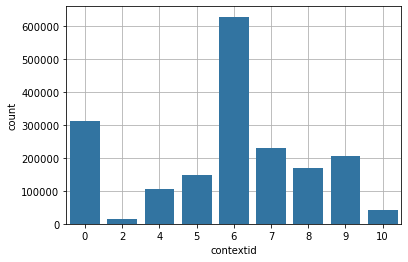

In [15]:
sns.countplot(data=df, x="contextid", color='tab:blue')
plt.grid()
pdf.export()
plt.show()

## `display_env` : environment of the display

Export PDF : output/discovering/01.pdf



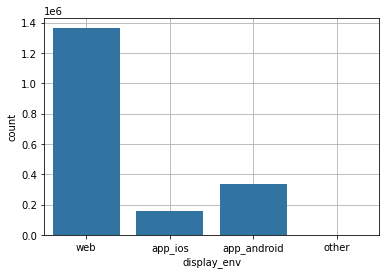

In [16]:
sns.countplot(x="display_env", data=df, color='tab:blue')
plt.grid()
pdf.export()
plt.show()

## `target_env` : Target environment of the displays of a campaign (in which environment a click will land)
* 1 for web
* 2 or App

Export PDF : output/discovering/02.pdf



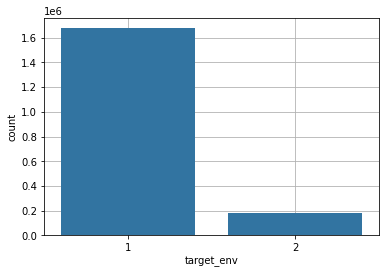

In [17]:
sns.countplot(x="target_env", data=df, color='tab:blue')
plt.grid()
pdf.export()
plt.show()

## `rtbtypeid` : Id of the Real Time Bidding Platform
(Technology platform that provides outsourced media selling and ad network management services for publishers).



In [18]:
f"Nombre de valeurs distinctes : {df.rtbtypeid.nunique()}"

'Nombre de valeurs distinctes : 41'

## `rtbadvisibility` : Value passed by RTB platforms to signal if the ad is above/below the fold or partially viewable
Encoding is not consistent between platforms so this id should always be crossed with rtbtypeid.

Export PDF : output/discovering/03.pdf



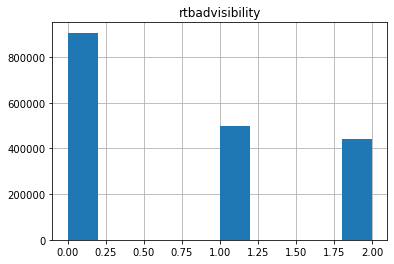

In [19]:
df.hist(column='rtbadvisibility')
pdf.export()
plt.show()

## `rtb_detectedlanguage` : Value passed by RTB platforms to signal the detected language
Should be crossed with rtbtypeid.


In [20]:
df.rtb_detectedlanguage.value_counts()

127.0    819446
12.0     535424
16.0     215648
10.0     124437
9.0       96058
          ...  
82.0          1
131.0         1
77.0          1
35.0          1
126.0         1
Name: rtb_detectedlanguage, Length: 68, dtype: int64

Export PDF : output/discovering/04.pdf



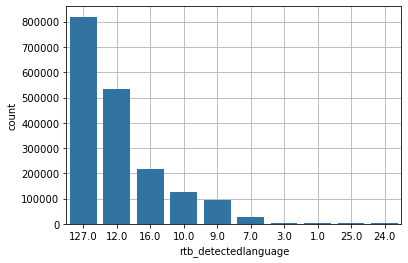

In [21]:
sns.countplot(x="rtb_detectedlanguage", data=df, order=pd.value_counts(df.rtb_detectedlanguage).iloc[:10].index, color='tab:blue')
plt.grid()
pdf.export()
plt.show()

## `urlhash2` : Part of the hashed URL


In [22]:
f"Nombre de valeurs distinctes : {df.urlhash2.nunique()}"

'Nombre de valeurs distinctes : 30480'

## `urlhash3` : Part of the hashed URL

In [23]:
f"Nombre de valeurs distinctes : {df.urlhash3.nunique()}"

'Nombre de valeurs distinctes : 121020'

## `urlhash4` : Part of the hashed URL

In [24]:
f"Nombre de valeurs distinctes : {df.urlhash4.nunique()}"

'Nombre de valeurs distinctes : 258491'

## `user_country` : Country of the Web user

In [25]:
df.user_country.value_counts()

FR    1120378
IT     377497
ES     253495
DE      85891
BE       2117
       ...   
TW          1
VE          1
KG          1
IM          1
JP          1
Name: user_country, Length: 144, dtype: int64

Export PDF : output/discovering/05.pdf



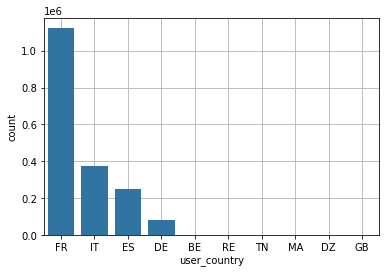

In [26]:
sns.countplot(x="user_country", data=df, order=pd.value_counts(df.user_country).iloc[:10].index, color='tab:blue')
plt.grid()
pdf.export()
plt.show()

## `hashed_affiliateid` : Hashed identifcation number of the publisher affiliate



In [27]:
f"Nombre de valeurs distinctes : {df.hashed_affiliateid.nunique()}"

'Nombre de valeurs distinctes : 3867'

## `hashed_app_id` : Hashed identifcation number of the App

In [28]:
f"Nombre de valeurs distinctes : {df.hashed_app_id.nunique()}"

'Nombre de valeurs distinctes : 9338'

## `googleviewability` : Information, when it's given by Google, on the vieawability of the page

Export PDF : output/discovering/06.pdf



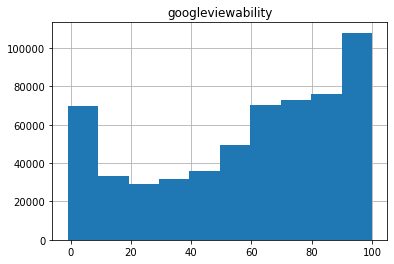

In [29]:
df.hist(column='googleviewability')
pdf.export()
plt.show()

## `googlepagevertical` : Publisher type

Export PDF : output/discovering/07.pdf



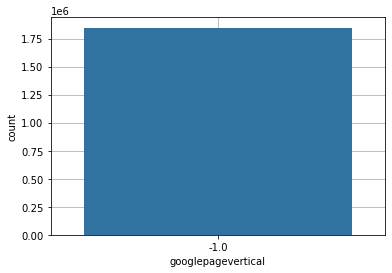

In [30]:
sns.countplot(x="googlepagevertical", data=df, color='tab:blue')
plt.grid()
pdf.export()
plt.show()

## `campaignscenario` : Id corresponding to the type of campaign 
* 0 = Retargeting

**Question** : modalités à expliciter


Export PDF : output/discovering/08.pdf



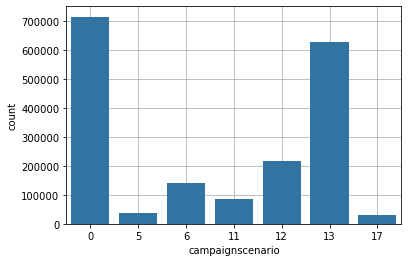

In [31]:
sns.countplot(x="campaignscenario", data=df, color='tab:blue')
plt.grid()
pdf.export()
plt.show()

## `campaignvertical` : Id corresponding to the type of products concerned in the campaign

Export PDF : output/discovering/09.pdf



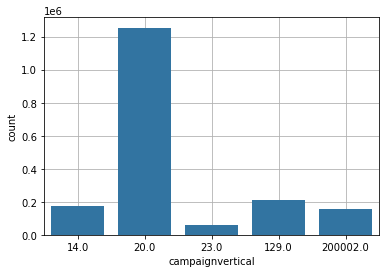

In [32]:
sns.countplot(x="campaignvertical", data=df, color='tab:blue')
plt.grid()
pdf.export()
plt.show()

## `campaignctrlast24h` : Campaign Click Through Rate computed on the last 24 hours 
(CTR = Clicks / Displays)


Export PDF : output/discovering/10.pdf



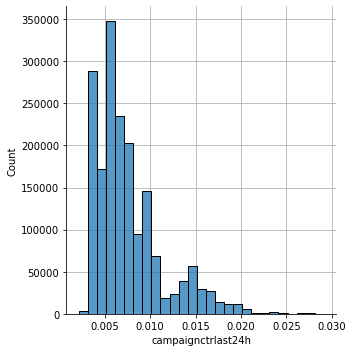

In [33]:
sns.displot(data=df, x='campaignctrlast24h', binwidth=0.001)
plt.grid()
pdf.export()
plt.show()

## `is_interstitial` : Information about the bid request primary source of the field

Export PDF : output/discovering/11.pdf



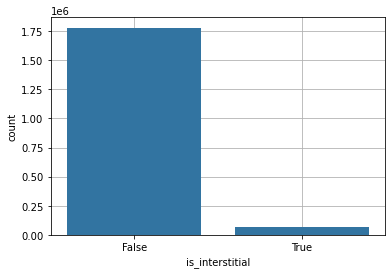

In [34]:
sns.countplot(x="is_interstitial", data=df, color='tab:blue')
plt.grid()
pdf.export()
plt.show()

## `dayssincelastvisitdouble` : Number of days since the last user's visit


Export PDF : output/discovering/12.pdf



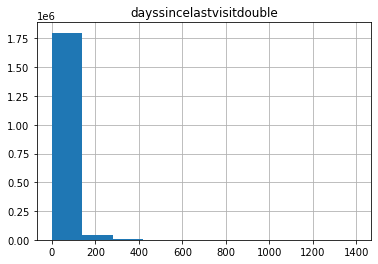

In [35]:
df.hist(column='dayssincelastvisitdouble')
pdf.export()
plt.show()

Export PDF : output/discovering/13.pdf



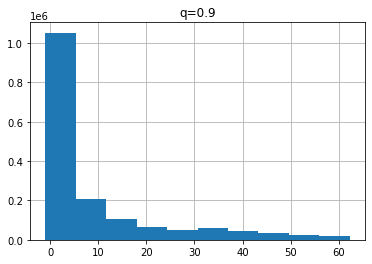

In [36]:
df[df.dayssincelastvisitdouble < df.dayssincelastvisitdouble.quantile(q=0.9)].hist(column='dayssincelastvisitdouble')
plt.title("q=0.9")
pdf.export()
plt.show()

## `ltf_lastpartnerclicktimestamp` : Last timestamp the user clicked on a display of this partner

Export PDF : output/discovering/14.pdf



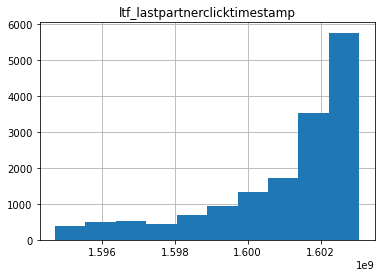

In [37]:
df.hist(column='ltf_lastpartnerclicktimestamp')
pdf.export()
plt.show()

## `ltf_nbglobalclick_4w` : Total number of clicks for this user over the past 4 weeks

Export PDF : output/discovering/15.pdf



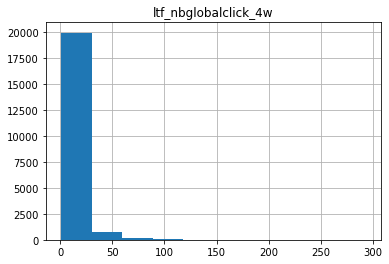

In [38]:
df.hist(column='ltf_nbglobalclick_4w')
pdf.export()
plt.show()

Export PDF : output/discovering/16.pdf



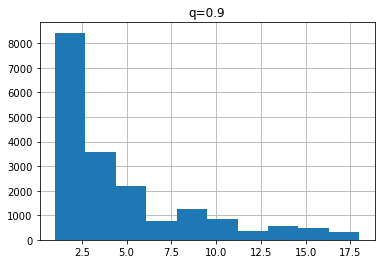

In [39]:
df[df.ltf_nbglobalclick_4w < df.ltf_nbglobalclick_4w.quantile(q=0.9)].hist(column='ltf_nbglobalclick_4w')
plt.title("q=0.9")
pdf.export()
plt.show()

## `ltf_nbglobaldisplay_4w` : Total number of displays for this user over the past 4 weeks

Export PDF : output/discovering/17.pdf



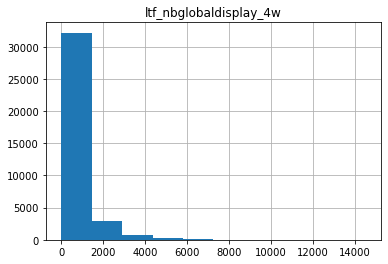

In [40]:
df.hist(column='ltf_nbglobaldisplay_4w')
pdf.export()
plt.show()

Export PDF : output/discovering/18.pdf



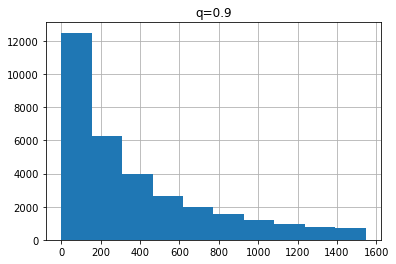

In [41]:
df[df.ltf_nbglobaldisplay_4w < df.ltf_nbglobaldisplay_4w.quantile(q=0.9)].hist(column='ltf_nbglobaldisplay_4w')
plt.title("q=0.9")
pdf.export()
plt.show()

## `ltf_nbglobaldisplaysincelastpartnerproductview` : Total number of displays for this user since the last view of a product of the partner

Export PDF : output/discovering/19.pdf



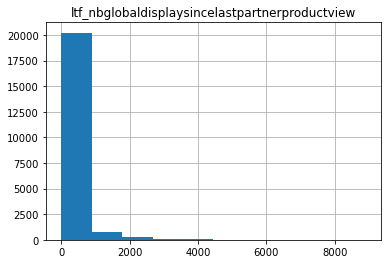

In [42]:
df.hist(column='ltf_nbglobaldisplaysincelastpartnerproductview')
pdf.export()
plt.show()

Export PDF : output/discovering/20.pdf



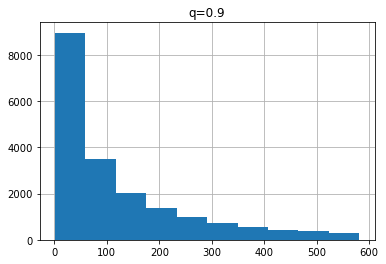

In [43]:
df[df.ltf_nbglobaldisplaysincelastpartnerproductview < df.ltf_nbglobaldisplaysincelastpartnerproductview.quantile(q=0.9)].hist(column='ltf_nbglobaldisplaysincelastpartnerproductview')
plt.title("q=0.9")
pdf.export()
plt.show()

## `ltf_nbpartnerdisplayssincelastclick` : Number of displays of the partner for this user since last click

Export PDF : output/discovering/21.pdf



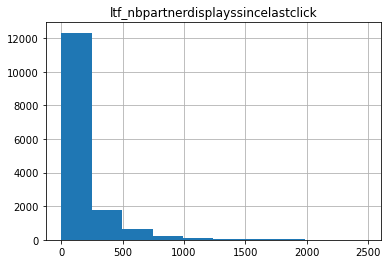

In [44]:
df.hist(column='ltf_nbpartnerdisplayssincelastclick')
pdf.export()
plt.show()

Export PDF : output/discovering/22.pdf



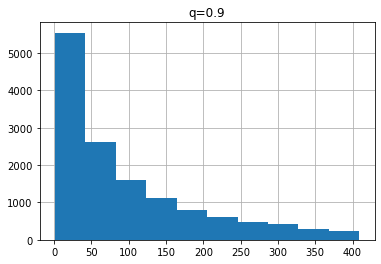

In [45]:
df[df.ltf_nbpartnerdisplayssincelastclick < df.ltf_nbpartnerdisplayssincelastclick.quantile(q=0.9)].hist(column='ltf_nbpartnerdisplayssincelastclick')
plt.title("q=0.9")
pdf.export()
plt.show()

## `ltf_nbpartnerclick_4w` : Number of clicks for this user on the partner over the past 4 weeks

Export PDF : output/discovering/23.pdf



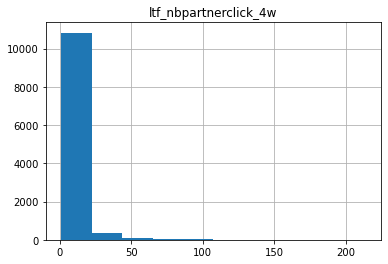

In [46]:
df.hist(column='ltf_nbpartnerclick_4w')
pdf.export()
plt.show()

Export PDF : output/discovering/24.pdf



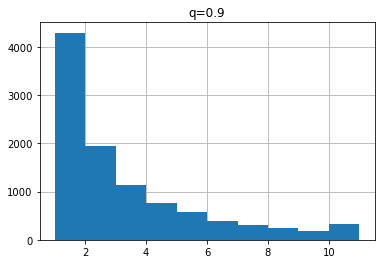

In [47]:
df[df.ltf_nbpartnerclick_4w < df.ltf_nbpartnerclick_4w.quantile(q=0.9)].hist(column='ltf_nbpartnerclick_4w')
plt.title("q=0.9")
pdf.export()
plt.show()

## `ltf_nbpartnerdisplay_4w` : Number of displays of the partner for this user over the past 4 weeks

Export PDF : output/discovering/25.pdf



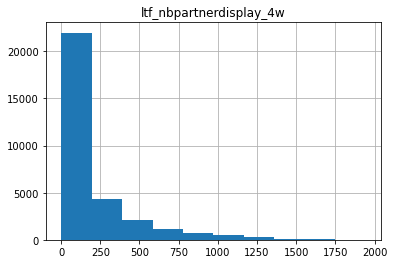

In [48]:
df.hist(column='ltf_nbpartnerdisplay_4w')
pdf.export()
plt.show()

## `ltf_nbpartnersales_4w` : Number of sales of the partner for this user over the past 4 weeks

Export PDF : output/discovering/26.pdf



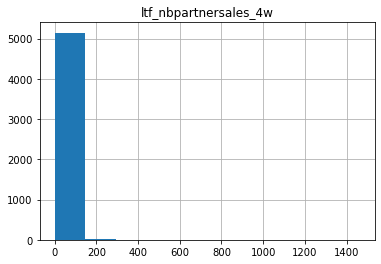

In [49]:
df.hist(column='ltf_nbpartnersales_4w')
pdf.export()
plt.show()

Export PDF : output/discovering/27.pdf



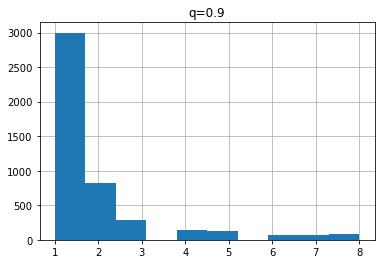

In [50]:
df[df.ltf_nbpartnersales_4w < df.ltf_nbpartnersales_4w.quantile(q=0.9)].hist(column='ltf_nbpartnersales_4w')
plt.title("q=0.9")
pdf.export()
plt.show()

## `ltf_nbpartnerdisplay_90d` : Number of displays for this user on the partner over the past 90 days

Export PDF : output/discovering/28.pdf



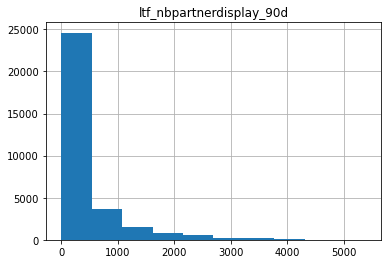

In [51]:
df.hist(column='ltf_nbpartnerdisplay_90d')
pdf.export()
plt.show()

## `ltf_nbpartnerclick_90d` : Number of clicks for this user on the partner over the past 90 days

Export PDF : output/discovering/29.pdf



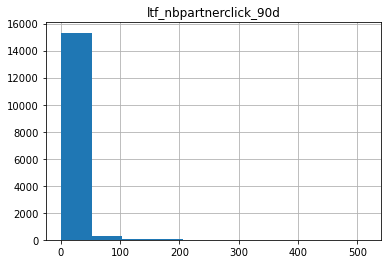

In [52]:
df.hist(column='ltf_nbpartnerclick_90d')
pdf.export()
plt.show()

Export PDF : output/discovering/30.pdf



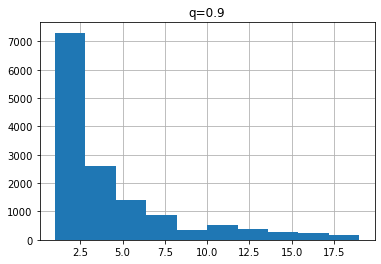

In [53]:
df[df.ltf_nbpartnerclick_90d < df.ltf_nbpartnerclick_90d.quantile(q=0.9)].hist(column='ltf_nbpartnerclick_90d')
plt.title("q=0.9")
pdf.export()
plt.show()

## `ltf_nbpartnersales_90d` : Number of sales of the partner for this user over the past 90 days

Export PDF : output/discovering/31.pdf



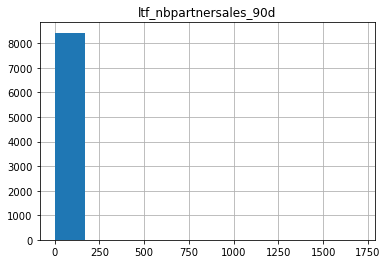

In [54]:
df.hist(column='ltf_nbpartnersales_90d')
pdf.export()
plt.show()

Export PDF : output/discovering/32.pdf



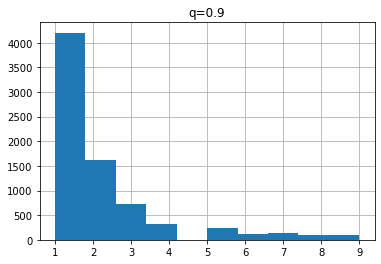

In [55]:
df[df.ltf_nbpartnersales_90d < df.ltf_nbpartnersales_90d.quantile(q=0.9)].hist(column='ltf_nbpartnersales_90d')
plt.title("q=0.9")
pdf.export()
plt.show()

## `nbdayssincelastclick` : Number of days since the last user's click

In [56]:
df["nbdayssincelastclick"].value_counts()

0      900805
1       84186
2       68412
3       52370
4       42993
        ...  
668         1
667         1
557         1
558         1
995         1
Name: nbdayssincelastclick, Length: 707, dtype: int64

Export PDF : output/discovering/33.pdf



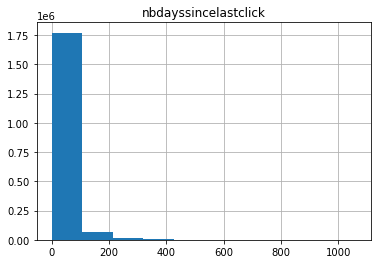

In [57]:
df.hist(column='nbdayssincelastclick')
pdf.export()
plt.show()

## `nbdisplay_1hour` : Number of displays for the user over the past hour

Export PDF : output/discovering/34.pdf



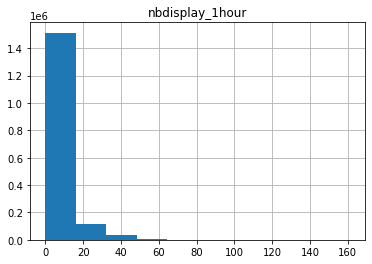

In [58]:
df.hist(column='nbdisplay_1hour')
pdf.export()
plt.show()

## `nbdisplaypartnerapprox_1d_sum_xdevice` : Number of displays of the partner over the past day on all devices of the user
(approximation)

Export PDF : output/discovering/35.pdf



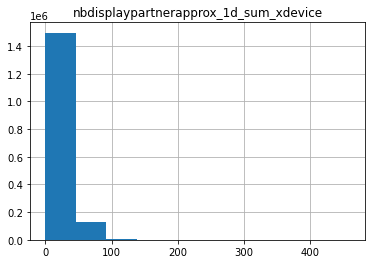

In [59]:
df.hist(column='nbdisplaypartnerapprox_1d_sum_xdevice')
pdf.export()
plt.show()

Export PDF : output/discovering/36.pdf



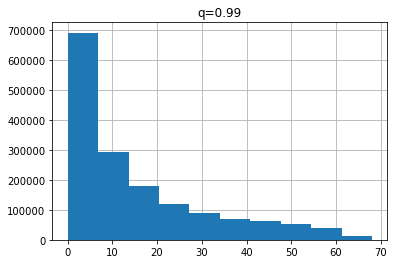

In [60]:
df[df.nbdisplaypartnerapprox_1d_sum_xdevice < df.nbdisplaypartnerapprox_1d_sum_xdevice.quantile(q=0.99)].hist(column='nbdisplaypartnerapprox_1d_sum_xdevice')
plt.title("q=0.99")
pdf.export()
plt.show()

## `nbdisplayaffiliateapprox_1d_sum_xdevice` : Number of displays of the publisher affiliate over the past day on all devices of the user 
(approximation)


Export PDF : output/discovering/37.pdf



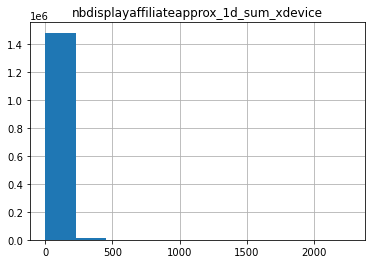

In [61]:
df.hist(column='nbdisplayaffiliateapprox_1d_sum_xdevice')
pdf.export()
plt.show()

Export PDF : output/discovering/38.pdf



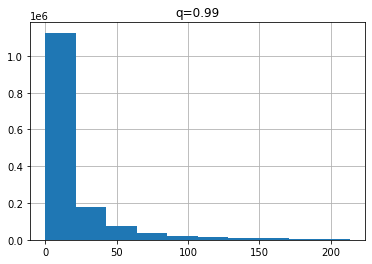

In [62]:
df[df.nbdisplayaffiliateapprox_1d_sum_xdevice < df.nbdisplayaffiliateapprox_1d_sum_xdevice.quantile(q=0.99)].hist(column='nbdisplayaffiliateapprox_1d_sum_xdevice')
plt.title("q=0.99")
pdf.export()
plt.show()

## `nbdisplayglobalapprox_1d_sum_xdevice` : Total number of displays over the past day on all devices of the user 
(approximation)


Export PDF : output/discovering/39.pdf



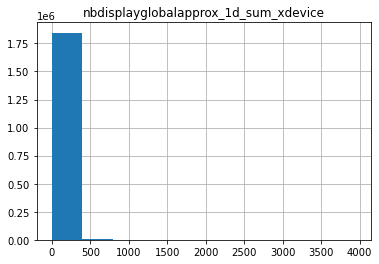

In [63]:
df.hist(column='nbdisplayglobalapprox_1d_sum_xdevice')
pdf.export()
plt.show()

Export PDF : output/discovering/40.pdf



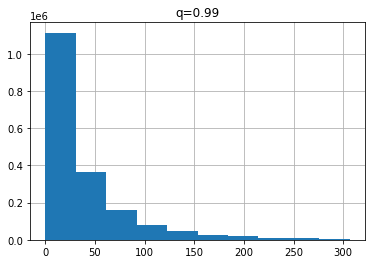

In [64]:
df[df.nbdisplayglobalapprox_1d_sum_xdevice < df.nbdisplayglobalapprox_1d_sum_xdevice.quantile(q=0.99)].hist(column='nbdisplayglobalapprox_1d_sum_xdevice')
plt.title("q=0.99")
pdf.export()
plt.show()

## `hashed_uid` : Hashed identification number of the Web user



In [65]:
f"Nombre de valeurs distinctes : {df.hashed_uid.nunique()}"

'Nombre de valeurs distinctes : 1385411'

## `hashed_xd_id` : Hashed cross device identification number 
(it can gather several devices of a Web user)

In [66]:
f"Nombre de valeurs distinctes : {df.hashed_xd_id.nunique()}"

'Nombre de valeurs distinctes : 1138732'

## `valueperclick` : Revenue in euro if the display is clicked

Export PDF : output/discovering/41.pdf



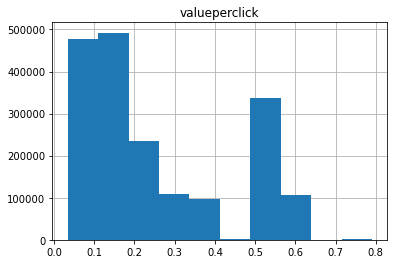

In [67]:
df.hist(column='valueperclick')
pdf.export()
plt.show()

## `device_type` : Type of device

Export PDF : output/discovering/42.pdf



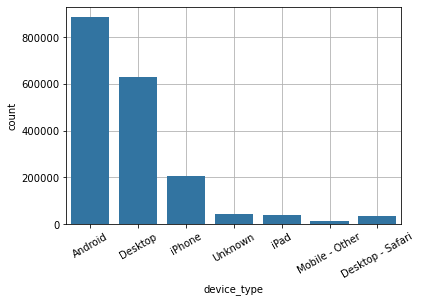

In [68]:
a = sns.countplot(x="device_type", data=df, color='tab:blue')
plt.grid()
plt.xticks(rotation=30)
pdf.export()
plt.show()

## `display_width` : Width of the banner where the ad is displayed

Export PDF : output/discovering/43.pdf



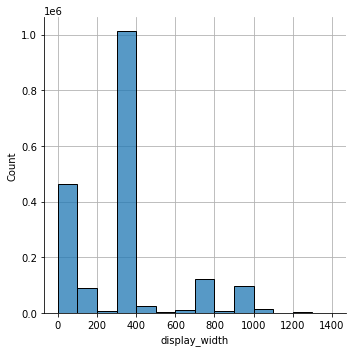

In [69]:
sns.displot(data=df, x='display_width', binwidth=100)
plt.grid()
pdf.export()
plt.show()

## `display_height` : Height of the banner where the ad is displayed

Export PDF : output/discovering/44.pdf



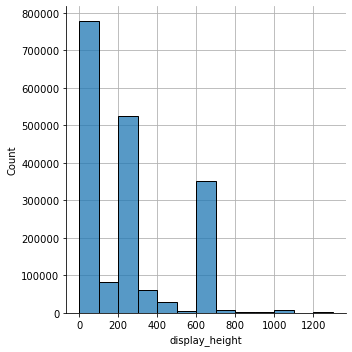

In [70]:
sns.displot(data=df, x='display_height', binwidth=100)
plt.grid()
pdf.export()
plt.show()

## `display_timestamp` : Timestamp of the display

Export PDF : output/discovering/45.pdf



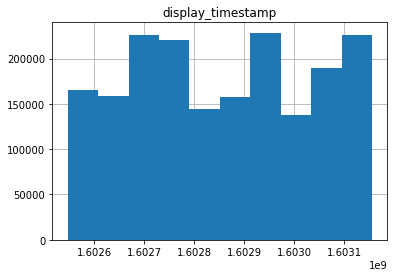

In [71]:
df.hist(column='display_timestamp')
pdf.export()
plt.show()

## `is_display_clicked` : Has the display been clicked?


Export PDF : output/discovering/46.pdf



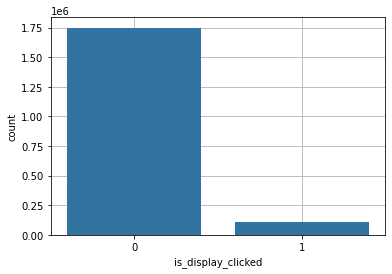

In [72]:
sns.countplot(x="is_display_clicked", data=df, color='tab:blue')
plt.grid()
pdf.export()
plt.show()

## `zonecostineuro` : Price paid in euros to display an add on this zone

Export PDF : output/discovering/47.pdf



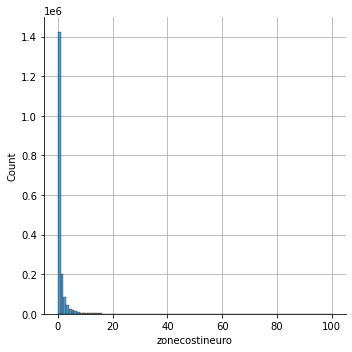

In [73]:
sns.displot(data=df, x='zonecostineuro', binwidth=1)
plt.grid()
pdf.export()
plt.show()

Export PDF : output/discovering/48.pdf



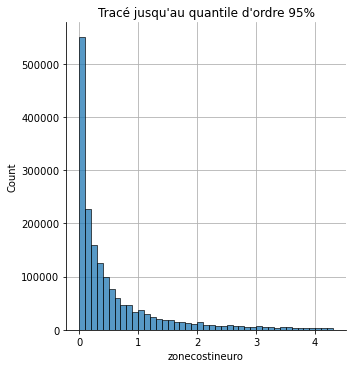

In [74]:
sns.displot(data=df[df.zonecostineuro < df.zonecostineuro.quantile(q=0.95)], x='zonecostineuro', binwidth=0.1)
plt.title("Tracé jusqu'au quantile d'ordre 95%")
plt.grid()
pdf.export()
plt.show()

In [75]:
print(f"Temps d'exécution total : {time.strftime('%H:%M:%S', time.gmtime(time.time()-t))}")

Temps d'exécution total : 00:01:02
